## Raccolta Tweets evento USOpenFinal

In [278]:
#Importo tutti i moduli necessari

import twitter
import json

from collections import Counter
import pandas as pd

import advertools

import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as sp
import random


In [279]:
bearer_token = json.load(open('application_keys.json'))['twitter']['Bearer token']

In [280]:
twitter_api_v1 = twitter.Twitter(auth=twitter.OAuth2(bearer_token=bearer_token))
twitter_api_v2 = twitter.Twitter(auth=twitter.OAuth2(bearer_token=bearer_token), api_version='2')

In [281]:
query = '#USOpenFinal since:2021-09-12'

In [282]:
response = twitter_api_v1.search.tweets(q=query,count=100, tweet_mode='extended')
tweets = response['statuses']
for i in range(100):
    if 'next_results' in response['search_metadata']:
        max_id = dict([tuple(tok.split('=')) for tok in response['search_metadata']['next_results'][1:].split('&')])['max_id']
        print(response['search_metadata']['next_results'])
        response = twitter_api_v1.search.tweets(q=query,count=100, max_id = max_id, tweet_mode='extended')
        tweets.extend(response['statuses'])
    else:
        break
print(len({t['id_str'] for t in tweets}))

?max_id=1437451053562163202&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437387536616275973&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437340407491297289&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437318827780497408&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437300113504833536&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437281119737729023&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437263147245522950&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437250334095659008&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437237789200842757&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437220993903341568&q=%23USOpenFinal%20since%3A2021-09-12&count=100&include_entities=1
?max_id=1437213010754478085&q=%23USOpenFinal%20sin

In [283]:
json.dump(tweets, open('dati_USOpenFinal.json','w'))

### Salvo i tweet da formato JSON a CSV

In [284]:
file_json = 'dati_USOpenFinal.json'

In [285]:
data = pd.read_json(file_json)
data
data.to_csv('dati_USOpen.csv')

In [286]:
colonne = data.columns
colonne

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'extended_entities', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

## Network Analysis

In [799]:
tweets = json.load(open('dati_USOpenFinal.json'))

In [800]:
f = open("grafo.txt","w") 

In [801]:
for tweet in tweets:
    #print('User ' + tweet['user']['id_str'])
    if tweet['entities']['user_mentions'] == []:
        continue
    else: 
        f.write(tweet['user']['id_str'])
        for user_mention in tweet['entities']['user_mentions']:
            #print('Mentions ' + user_mention['id_str'])
            f.write(',' + user_mention['id_str'])
        f.write('\n')
f.close()

#### Grafo

Grafo orientato

In [802]:
graph = nx.DiGraph()

In [803]:
f = open("grafo.txt") 
lista_righe = f.readlines()
#print(lista_righe)
for line in lista_righe:
    info = line.strip().split(',')
    #print(info)
    for e in info[1:]:
        graph.add_edge(info[0],e)


In [806]:
nx.write_gexf(graph, 'grafo.gexf')

In [953]:
print('Numero di nodi: {} - numero di archi:{}'.format(graph.order(),graph.size()))

Numero di nodi: 5876 - numero di archi:7968


In [653]:
dict(graph.degree())
#graph.degree()

{'64494244': 6,
 '182839067': 1,
 '259925559': 336,
 '719870195695816704': 335,
 '14836219': 1,
 '19980499': 14,
 '2728794149': 2,
 '1402566253': 12,
 '25268540': 12,
 '1046940551717761029': 3,
 '1267885684724989953': 6,
 '1239724864203702273': 2,
 '1350922791084843014': 15,
 '1194627927272542209': 77,
 '26833044': 2,
 '1197994613665083394': 1002,
 '14836197': 160,
 '1167130654854848512': 2,
 '144884794': 1,
 '1277902189252481025': 1,
 '469792744': 71,
 '17636207': 3,
 '145734250': 470,
 '183585551': 511,
 '1379396683939856385': 2,
 '1420771862125162498': 2,
 '1412825982243905536': 2,
 '3375964942': 1,
 '15439395': 488,
 '202878214': 3,
 '203322585': 9,
 '202879165': 3,
 '216103963': 3,
 '172862382': 3,
 '716372740916305920': 2,
 '1298426231889833989': 2,
 '811619500093276162': 3,
 '626529654': 2,
 '369700685': 2,
 '19668846': 1,
 '429840099': 2,
 '628794870': 1,
 '1378102303350218754': 2,
 '970324204670373889': 2,
 '302644749': 1,
 '1118936976474935296': 2,
 '1407298520537776134': 2,


In [654]:
user_max = sorted(dict(graph.degree()).items(),key= lambda x:x[1], reverse=True)[0][0]
print('Id nodo con grado massimo: {}'.format(user_max))

Id nodo con grado massimo: 119691332


In [655]:
graph.degree('119691332')

1072

In [835]:
for tweet in tweets:
    if tweet['id_str'] == '119691332':
        t = '@' + tweet['user']['screen_name']
    else:
        for user_mention in tweet['entities']['user_mentions']:
            if user_mention['id_str'] == '119691332':
                t = '@' + user_mention['screen_name']
print(t)

@rorybremner


In [811]:
#vicini nodo con grado massimo solo se non orientato
#set(graph.adj['119691332'].keys())

set()

#### Statistiche di base

In [666]:
import scipy.stats as sp

In [1533]:
campione_grado = list(dict(graph.degree()).values())

In [1647]:
print('Deviazione standard: {}'.format(np.std(campione_grado)))
print('Mediana: {}'.format(np.median(campione_grado)))

print('Grado medio: {}'.format(np.mean(campione_grado)))
print('Grado massimo: {}'.format(np.max(campione_grado)))
print('Grado minimo: {}'.format(np.min(campione_grado)))
print('Densità: {}'.format(nx.density(graph)))

#print('Diametro: {}'.format(nx.diameter(graph)))

Deviazione standard: 23.49492937680416
Mediana: 1.0
Grado medio: 2.7120490129339685
Grado massimo: 1072
Grado minimo: 1
Densità: 0.00023081268195182712


#### ECDF Random VS Graph

In [1605]:
random_graph_erdos = nx.fast_gnp_random_graph(len(graph.nodes), nx.density(graph))
random_degrees = list(dict(random_graph_erdos.degree()).values())

In [1703]:
print('Deviazione standard: {}'.format(np.std(random_degrees)))
print('Mediana: {}'.format(np.median(random_degrees)))

print('Grado medio: {}'.format(np.mean(random_degrees)))
print('Grado massimo: {}'.format(np.max(random_degrees)))
print('Grado minimo: {}'.format(np.min(random_degrees)))
print('Densità: {}'.format(nx.density(random_graph_erdos)))


Deviazione standard: 1.1748332319275885
Mediana: 1.0
Grado medio: 1.365214431586113
Grado massimo: 8
Grado minimo: 0
Densità: 0.00023237692452529582


In [1716]:
tabella_statistiche = pd.DataFrame( columns = ['Statistiche', 'Random', 'USOpen'])

In [1717]:
lista_stat = ['Grado Medio','Deviazione standard', 'Mediana', 'Grado Massimo', 'Grado Minimo', 'Densità']
tabella_statistiche['Statistiche'] = lista_stat

In [1718]:
lista_random = [np.mean(random_degrees),np.std(random_degrees), np.median(random_degrees), np.max(random_degrees), np.min(random_degrees), nx.density(random_graph_erdos)]
lista_usopen = [np.mean(campione_grado),np.std(campione_grado), np.median(campione_grado), np.max(campione_grado), np.min(campione_grado), nx.density(graph)]
tabella_statistiche['Random'] = lista_random
tabella_statistiche['USOpen'] = lista_usopen

In [1719]:
tabella_statistiche

,Statistiche,Random,USOpen
0,Grado Medio,1.365214,2.712049
1,Deviazione standard,1.174833,23.494929
2,Mediana,1.000000,1.000000
3,Grado Massimo,8.000000,1072.000000
4,Grado Minimo,0.000000,1.000000
5,Densità,0.000232,0.000231


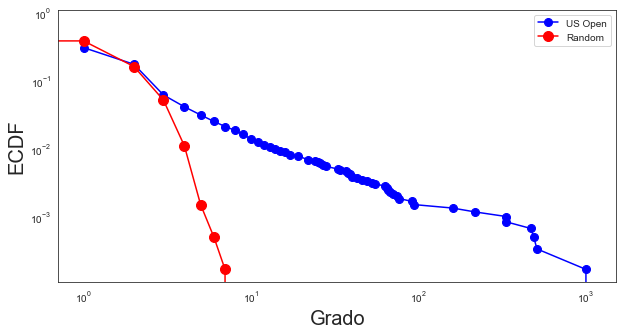

In [1702]:
cdf = ECDF(campione_grado)
x = np.unique(campione_grado)
y = cdf(x)

cdf_random = ECDF(random_degrees)
x_random = np.unique(random_degrees)
y_random = cdf_random(x_random)
 
fig_cdf = plt.figure(figsize=(10,5))
axes = fig_cdf.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='-', label = "US Open", color = "blue")
axes.loglog(x_random,1-y_random,marker='o',ms=10, linestyle='-', label="Random", color = "red")
axes.legend()
axes.set_xlabel('Grado',size=20)
axes.set_ylabel('ECDF', size = 20)
#plt.savefig("ConfrontoRandom.png", dpi=1200, bbox_inches='tight')
plt.show()

#### IN DEGREE

In [1695]:
in_degree = list(dict(graph.in_degree()).values())
print('Deviazione standard: {}'.format(np.std(in_degree)))
print('Mediana: {}'.format(np.median(in_degree)))

print('Grado massimo: {}'.format(max(in_degree)))
print('Grado minimo: {}'.format(min(in_degree)))
print('Grado medio: {}'.format(np.mean(in_degree)))

Deviazione standard: 23.2409288859555
Mediana: 0.0
Grado massimo: 1072
Grado minimo: 0
Grado medio: 1.3560245064669842
Densità: 0.00023081268195182712


In [1688]:
random_digraph_erdos = nx.fast_gnp_random_graph(len(graph.nodes), nx.density(graph), directed=True)
random_in_degrees = list(dict(random_digraph_erdos.in_degree()).values())

In [1694]:
print('Deviazione standard: {}'.format(np.std(random_in_degrees)))
print('Mediana: {}'.format(np.median(random_in_degrees)))

print('Grado medio: {}'.format(np.mean(random_in_degrees)))
print('Grado massimo: {}'.format(np.max(random_in_degrees)))
print('Grado minimo: {}'.format(np.min(random_in_degrees)))

Deviazione standard: 1.1568427186042003
Mediana: 1.0
Grado medio: 1.3471749489448603
Grado massimo: 7
Grado minimo: 0
Densità: 0.00022930637428848687


In [1724]:
tabella_statistiche_in = pd.DataFrame( columns = ['Statistiche', 'Random', 'USOpen'])

In [1725]:
lista_stat = ['Grado Medio','Deviazione standard', 'Mediana', 'Grado Massimo', 'Grado Minimo']
tabella_statistiche_in['Statistiche'] = lista_stat

In [1727]:
lista_random = [np.mean(random_in_degrees),np.std(random_in_degrees), np.median(random_in_degrees), np.max(random_in_degrees), np.min(random_in_degrees)]
lista_usopen = [np.mean(in_degree),np.std(in_degree), np.median(in_degree), np.max(in_degree), np.min(in_degree)]
tabella_statistiche_in['Random'] = lista_random
tabella_statistiche_in['USOpen'] = lista_usopen

In [1728]:
tabella_statistiche_in

,Statistiche,Random,USOpen
0,Grado Medio,1.347175,1.356025
1,Deviazione standard,1.156843,23.240929
2,Mediana,1.000000,0.000000
3,Grado Massimo,7.000000,1072.000000
4,Grado Minimo,0.000000,0.000000


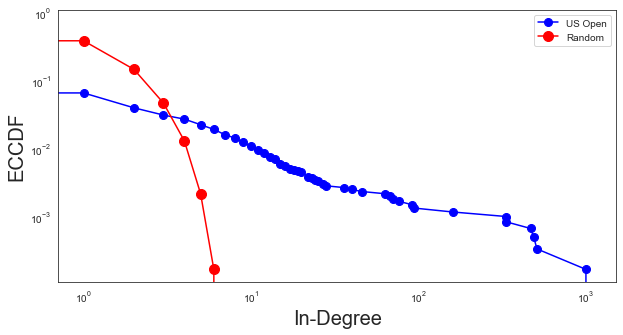

In [1710]:
cdf = ECDF(in_degree)
x = np.unique(in_degree)
y = cdf(x)

cdf_random = ECDF(random_in_degrees)
x_random = np.unique(random_in_degrees)
y_random = cdf_random(x_random)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='-', label = "US Open", color = "blue")
axes.loglog(x_random,1-y_random,marker='o',ms=10, linestyle='-', label="Random", color = "red")
axes.legend()
axes.set_xlabel('In-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
#plt.savefig("InDegreeDistribution.png", dpi=1200, bbox_inches='tight')
plt.show()

In [1696]:
print(graph.in_degree()['259925559'])
print(graph.in_degree()['719870195695816704'])
print(graph.in_degree()['1194627927272542209'])
print(graph.in_degree()['1197994613665083394'])

336
335
77
1002


#### OUT DEGREE

In [1699]:
out_degree = list(dict(graph.out_degree()).values())
print('Deviazione standard: {}'.format(np.std(out_degree)))
print('Mediana: {}'.format(np.median(out_degree)))

print('Grado massimo: {}'.format(max(out_degree)))
print('Grado minimo: {}'.format(min(out_degree)))
print('Grado medio: {}'.format(np.mean(out_degree)))

Deviazione standard: 3.556678985677484
Mediana: 1.0
Grado massimo: 218
Grado minimo: 0
Grado medio: 1.3560245064669842


In [1700]:
random_out_degrees = list(dict(random_digraph_erdos.out_degree()).values())

In [1701]:
print('Deviazione standard: {}'.format(np.std(random_out_degrees)))
print('Mediana: {}'.format(np.median(random_out_degrees)))

print('Grado medio: {}'.format(np.mean(random_out_degrees)))
print('Grado massimo: {}'.format(np.max(random_out_degrees)))
print('Grado minimo: {}'.format(np.min(random_out_degrees)))


Deviazione standard: 1.1663657099695905
Mediana: 1.0
Grado medio: 1.3471749489448603
Grado massimo: 7
Grado minimo: 0


In [1729]:
tabella_statistiche_out = pd.DataFrame( columns = ['Statistiche', 'Random', 'USOpen'])

In [1730]:
lista_stat = ['Grado Medio','Deviazione standard', 'Mediana', 'Grado Massimo', 'Grado Minimo']
tabella_statistiche_out['Statistiche'] = lista_stat

In [1731]:
lista_random = [np.mean(random_out_degrees),np.std(random_out_degrees), np.median(random_out_degrees), np.max(random_out_degrees), np.min(random_out_degrees)]
lista_usopen = [np.mean(out_degree),np.std(out_degree), np.median(out_degree), np.max(out_degree), np.min(out_degree)]
tabella_statistiche_out['Random'] = lista_random
tabella_statistiche_out['USOpen'] = lista_usopen

In [1732]:
tabella_statistiche_out

,Statistiche,Random,USOpen
0,Grado Medio,1.347175,1.356025
1,Deviazione standard,1.166366,3.556679
2,Mediana,1.000000,1.000000
3,Grado Massimo,7.000000,218.000000
4,Grado Minimo,0.000000,0.000000


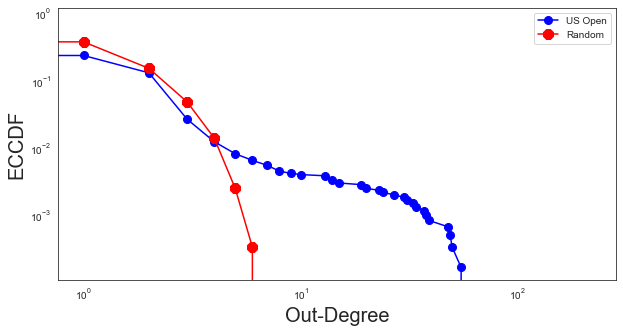

In [1711]:
cdf = ECDF(out_degree)
x = np.unique(out_degree)
y = cdf(x)

cdf_random = ECDF(random_out_degrees)
x_random = np.unique(random_out_degrees)
y_random = cdf_random(x_random)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='-', label = "US Open", color = "blue")
axes.loglog(x_random,1-y_random,marker='8',ms=10, linestyle='-', label="Random", color = "red")
axes.legend()
axes.set_xlabel('Out-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
#plt.savefig("OutDegreeDistribution.png", dpi=1200, bbox_inches='tight')
plt.show()

In [1697]:
print(graph.out_degree()['259925559'])
print(graph.out_degree()['719870195695816704'])
print(graph.out_degree()['1194627927272542209'])
print(graph.out_degree()['1197994613665083394'])

0
0
0
0


#### HUB

In [1679]:
#Hub
percentile_99 = np.percentile(campione_grado,99)
print(percentile_99)

15.0


In [1680]:
hub_nodi = [k for k,v in dict(graph.degree()).items() if v>= percentile_99]
len(hub_nodi)

60

In [2058]:
for tweet in tweets:
    if tweet['id_str'] == '119691332':
        tt = '@' + tweet['user']['screen_name']
    else:
        for user_mention in tweet['entities']['user_mentions']:
            if user_mention['id_str'] == '119691332':
                tt = '@' + user_mention['screen_name']
print(tt)
tt = ''

@rorybremner


In [906]:
hub_dati = pd.DataFrame(columns = ["id_str", "screen_name", "grado"])

In [907]:
hub_dati['id_str'] = hub_nodi[:10]
hub_dati['screen_name'] = lista

hub_dati[1:10]
hub_dati[1:10].to_csv('hub_table.csv')

In [1019]:
hub_dati[1:10]

,id_str,screen_name,grado
1,259925559,@DjokerNole,336
2,719870195695816704,@DaniilMedwed,335
3,19980499,@atptour,NaN
4,1402566253,@ZEZO_CARTOONS,NaN
5,25268540,@Eurosport_UK,NaN
6,1267885684724989953,@realgambyl,NaN
7,1350922791084843014,@superbid_io,NaN
8,1194627927272542209,@leylahfernandez,77
9,1197994613665083394,@EmmaRaducanu,1002


In [1584]:
hd = pd.DataFrame(columns = ["id_str", "screen_name", "grado"])

In [1585]:
index = 0
lista = []
check = False
for g in hub_dati['grado']:
    if g > 0:
        check = True
    if check == True:
        lista.append(index)
    check = False
    index += 1

In [1586]:
n = 0
for i, row in hub_dati.iterrows():
        if i in lista:
            hd.loc[n] = row
            n +=1

In [1588]:
centralità = [nx.degree_centrality(graph)['259925559'], nx.degree_centrality(graph)['719870195695816704'],
              nx.degree_centrality(graph)['1194627927272542209'], nx.degree_centrality(graph)['1197994613665083394'] ]

In [1589]:
hd['degree_centrality'] = centralità

In [1590]:
hd

,id_str,screen_name,grado,degree_centrality
0,259925559,@DjokerNole,336,0.057191
1,719870195695816704,@DaniilMedwed,335,0.057021
2,1194627927272542209,@leylahfernandez,77,0.013106
3,1197994613665083394,@EmmaRaducanu,1002,0.170553


In [1597]:
hd.sort_values(by=['grado'], ascending = False, inplace = True)
hd

,id_str,screen_name,grado,degree_centrality
3,1197994613665083394,@EmmaRaducanu,1002,0.170553
0,259925559,@DjokerNole,336,0.057191
1,719870195695816704,@DaniilMedwed,335,0.057021
2,1194627927272542209,@leylahfernandez,77,0.013106


In [1773]:
hub_max = pd.DataFrame(columns = ["id_str", "screen_name", "grado", "degree_centrality"])

In [1774]:
id_str = []
s_name = []
grado = []
centralità = []

In [1775]:
id_str = ['119691332']
s_name = ['@rorybremner']
grado = [graph.degree()['119691332']]
centralità = [nx.degree_centrality(graph)['119691332']]

In [1776]:
hub_max['id_str'] = id_str
hub_max['screen_name'] = s_name
hub_max['grado'] = grado
hub_max['degree_centrality'] = centralità

In [1777]:
hub_max

,id_str,screen_name,grado,degree_centrality
0,119691332,@rorybremner,1072,0.182468


#### Indici di Centralità

In [679]:
graph_centrality = nx.degree_centrality(graph)
max_centrality = max(graph_centrality.items(), key=lambda x:x[1])
max_centrality

('119691332', 0.182468085106383)

In [1024]:
print(nx.degree_centrality(graph)['259925559'])
print(nx.degree_centrality(graph)['719870195695816704'])
print(nx.degree_centrality(graph)['1194627927272542209'])
print(nx.degree_centrality(graph)['1197994613665083394'])

0.05719148936170213
0.057021276595744685
0.013106382978723404
0.1705531914893617


##### Closeness

In [680]:
graph_closeness = nx.closeness_centrality(graph)
max_closeness = max(graph_closeness.items(), key=lambda x:x[1])
max_closeness

('119691332', 0.1822992947312274)

In [1025]:
print(nx.closeness_centrality(graph)['259925559'])
print(nx.closeness_centrality(graph)['719870195695816704'])
print(nx.closeness_centrality(graph)['1194627927272542209'])
print(nx.closeness_centrality(graph)['1197994613665083394'])

0.057652588123213715
0.05710771972819428
0.01313842302878598
0.17067932268833205


In [682]:
print(f"Il nodo con id {max_centrality[0]} ha grado di centralità pari a {max_centrality[1]:.2f} che è il massimo grado del Grafo")
print(f"Il nodo con id {max_closeness[0]} ha grado di closeness centrality pari a {max_closeness[1]:.2f} che è il massimo grado del Grafo")
print(f"Il nodo con id {max_betweenness[0]} ha grado di betweenness centrality pari a {max_betweenness[1]:.2f} che è il massimo grado del Grafo")

Il nodo con id 119691332 ha grado di centralità pari a 0.18 che è il massimo grado del Grafo
Il nodo con id 119691332 ha grado di closeness centrality pari a 0.18 che è il massimo grado del Grafo
Il nodo con id 3244005088 ha grado di betweenness centrality pari a 0.00 che è il massimo grado del Grafo


##### Eigenvector

In [1042]:
graph_eigen = nx.eigenvector_centrality(graph, weight=None)
print(graph_eigen['259925559'])
print(graph_eigen['719870195695816704'])
print(graph_eigen['1194627927272542209'])
print(graph_eigen['1197994613665083394'])

2.0708503023657323e-05
2.738260068448128e-05
5.104274689898185e-06
0.00011916084365837817


In [688]:
max_eigen = sorted(graph_eigen.items(),key= lambda x:x[1], reverse=True)[0]
print(max_eigen)

('51197470', 0.21218928612619287)


##### Katz

In [689]:
grafo_matrice = nx.to_numpy_matrix(graph)

In [690]:
alpha = 1/(float(np.max(np.linalg.eig(nx.to_numpy_matrix(graph))[0]))+10)
alpha

<ipython-input-690-b15b260d87d9>:1: ComplexWarning:

Casting complex values to real discards the imaginary part



0.048838250917126645

In [691]:
katz_cent = nx.katz_centrality(graph, alpha=alpha, beta=1.0)
list(katz_cent.items())[:10]

[('64494244', 0.00827419184751318),
 ('182839067', 0.008678288905098471),
 ('259925559', 0.14573226599016256),
 ('719870195695816704', 0.14514410039551187),
 ('14836219', 0.008678288905098471),
 ('19980499', 0.013931550653707273),
 ('2728794149', 0.00827419184751318),
 ('1402566253', 0.012719259480951395),
 ('25268540', 0.01334044586696214),
 ('1046940551717761029', 0.00827419184751318)]

In [1780]:
max_centrality = sorted(katz_cent.items(),key= lambda x:x[1], reverse=True)[0]
print(max_centrality)

('119691332', 0.4414869368145392)


In [1043]:
print(katz_cent['259925559'])
print(katz_cent['719870195695816704'])
print(katz_cent['1194627927272542209'])
print(katz_cent['1197994613665083394'])

0.14573226599016256
0.14514410039551187
0.0399027855124045
0.4256614023526154


##### Page Rank

In [2068]:
pr_centrality = nx.pagerank_numpy(graph,weight=None)

In [2071]:
max_centrality = sorted(pr_centrality.items(),key= lambda x:x[1], reverse=True)[0]
print(max_centrality)

('119691332', 0.08181592241447032)


In [2072]:
p_max = pd.DataFrame(columns = ["id_str", "screen_name", "page_rank"])

In [2077]:
id_ = []
id_ = ['119691332']
sn = []
sn = '@rorybremner'
pg = []
pg = 0.08181592241447032

In [2078]:
p_max['id_str'] = id_
p_max['screen_name'] = sn
p_max['page_rank'] = pg

In [2079]:
p_max

,id_str,screen_name,page_rank
0,119691332,@rorybremner,0.081816


In [1044]:
print(pr_centrality['259925559'])
print(pr_centrality['719870195695816704'])
print(pr_centrality['1194627927272542209'])
print(pr_centrality['1197994613665083394'])

0.017429713261333895
0.016949106732273525
0.0033461605431484446
0.04679008719693011


#### Componenti connesse

In [1709]:
nx.is_strongly_connected(graph), nx.is_weakly_connected(graph), nx.is_connected(graph.to_undirected())

(False, False, False)

In [696]:
wc_size = [len(e) for e in nx.weakly_connected_components(graph)]
sc_size = [len(e) for e in nx.strongly_connected_components(graph)]
print(wc_size, sc_size)

408 5847


#### Giant Component

In [2051]:
giant_wc = graph.subgraph(max(nx.weakly_connected_components(graph),key=len)).copy()
print('Numero di nodi della Giant Component: {} - Numero di archi della Giant Component: {}'.format(giant_wc.order(),giant_wc.size()))

Numero di nodi della Giant Component: 4367 - Numero di archi della Giant Component: 6757


In [2052]:
perc_nodi = 4367/5876
perc_nodi

0.7431926480599047

In [2053]:
giant_sc = graph.subgraph(max(nx.strongly_connected_components(graph),key=len)).copy()
print('Numero di nodi della Giant Component: {} - Numero di archi della Giant Component: {}'.format(giant_sc.order(),giant_sc.size()))

Numero di nodi della Giant Component: 19 - Numero di archi della Giant Component: 172


In [2054]:
perc_nodi = 19/5876
perc_nodi

0.003233492171545269

#### Reciprocità

In [717]:
def reciprocity(graph):
    e = graph.size()
    count = 0
    for s, d in graph.edges():
        if graph.has_edge(d,s):
            count += 1
    return count/e

In [718]:
reciprocity(graph)

0.027359437751004016

In [2045]:
def reciprocity2(graph):
    e = graph.to_undirected().size()
    count = 0
    for s, d in graph.edges():
        if graph.has_edge(d,s):
            count += 1
    return count/(2*e)

In [2046]:
reciprocity2(graph)

0.013802709889831581

#### Transitività (solo nel caso di rete non orientata)

In [1626]:
global_clustering_coeff = nx.transitivity(graph.to_undirected())
print("Coefficiente di Clustering globale: {}".format(global_clustering_coeff))

Coefficiente di Clustering globale: 0.005754781840056965


In [1629]:
avg_local_clustering_coeff = nx.average_clustering(graph.to_undirected())
avg_local_clustering_coeff0 = nx.average_clustering(graph.to_undirected(), count_zeros=False)

print('Coefficiente di clustering locale medio: {}'.format(avg_local_clustering_coeff))
print('Coefficiente di clustering locale medio > 0: {}'.format(avg_local_clustering_coeff0))

Coefficiente di clustering locale medio: 0.12074328508521005
Coefficiente di clustering locale medio > 0: 0.7038566896435459


## Sentiment Analysis

Com'è stato il sentimento generale durante l'ultima giornata degli US Open?
Com'è cambiato il sentiment su Twitter durante la giornata delle finali degli US Open? 
C'è qualche correlazione con gli orari in cui si sono svolti i match? 

### VADER sentiment analysis

In [1782]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [1783]:
#Creo la mia tabella con il testo dei tweet
tweets_sentiment = pd.DataFrame(columns = ["full_text"])
i = ["full_text"]
tweets_sentiment[i] = data[i]

In [1784]:
df_ = pd.read_json(file_json)

In [1785]:
dataset = pd.DataFrame(columns = ["created_at", "id", "full_text"])

In [1786]:
i = ["created_at", "id", "full_text"]
dataset[i] = df_[i]
dataset

,created_at,id,full_text
0,2021-09-13 20:48:02+00:00,1437518457227120640,@BrainGameTennis has a simple but clear analys...
1,2021-09-13 20:47:30+00:00,1437518323474907150,RT @ZEZO_CARTOONS: #USOpenFinal #USOpen #Djoko...
2,2021-09-13 20:41:20+00:00,1437516769179095040,RT @realgambyl: We have a new Grand Slam champ...
3,2021-09-13 20:40:40+00:00,1437516604028358666,Acusate ma #uominiedonne #lorettagoggi #MetGal...
4,2021-09-13 20:38:42+00:00,1437516107749867522,RT @superbid_io: 🔥 We're proud to announce our...
...,...,...,...
8980,2021-09-12 00:00:40+00:00,1436842157734711296,RT @stephenfry: What a glorious day for two re...
8981,2021-09-12 00:00:37+00:00,1436842143918739459,RT @rorybremner: BREAKING: Education Secretary...
8982,2021-09-12 00:00:36+00:00,1436842140622102531,Fantastic ❤️❤️❤️ #EmmaRadacanu #USOpenFinal #i...
8983,2021-09-12 00:00:27+00:00,1436842105733885955,RT @stephenfry: What a glorious day for two re...


In [1787]:
dataset['scores'] = dataset['full_text'].apply(lambda Description: sid.polarity_scores(Description))
#dataset.head()

In [1788]:
dataset['compound'] = dataset['scores'].apply(lambda score_dict: score_dict['compound']) 
dataset['sentiment']= dataset.loc[dataset.compound > 0,'sentiment']='Positive' 
dataset.loc[dataset.compound == 0,'sentiment']='Neutral' 
dataset.loc[dataset.compound < 0,'sentiment']='Negative'

In [1789]:
#dataset.head()

In [1790]:
def count_values(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Totale','Percentuale'])
#Count_values for sentiment
count_values(dataset,'sentiment')

,Totale,Percentuale
Positive,5380,59.88
Neutral,2650,29.49
Negative,955,10.63


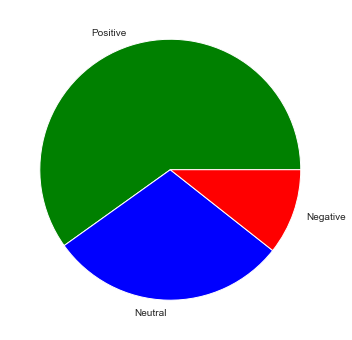

In [1791]:
# create data for Pie Chart
pc = count_values(dataset,'sentiment')
names= pc.index
size=pc['Percentuale']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
plt.show()

In [2014]:
dataset['created_at_hour'] = dataset['created_at'].dt.round('5min')
j = ['created_at_hour','id', 'full_text','compound', 'sentiment']
dataframe = pd.DataFrame(columns = ['created_at_hour', 'id', 'full_text','compound', 'sentiment'])
dataframe[j] = dataset[j]

In [2015]:
aggregation = {'num_tweets': ('id', 'count')}

dataset_sentiment_nel_tempo = dataset.groupby(['created_at_hour', 'sentiment']).agg(**aggregation).reset_index()
dataset_sentiment_nel_tempo

,created_at_hour,sentiment,num_tweets
0,2021-09-12 00:00:00+00:00,Negative,2
1,2021-09-12 00:00:00+00:00,Positive,22
2,2021-09-12 00:05:00+00:00,Negative,1
3,2021-09-12 00:05:00+00:00,Neutral,2
4,2021-09-12 00:05:00+00:00,Positive,21
...,...,...,...
1164,2021-09-13 20:35:00+00:00,Positive,2
1165,2021-09-13 20:40:00+00:00,Neutral,1
1166,2021-09-13 20:40:00+00:00,Positive,2
1167,2021-09-13 20:50:00+00:00,Neutral,1


In [1794]:
import seaborn as sns

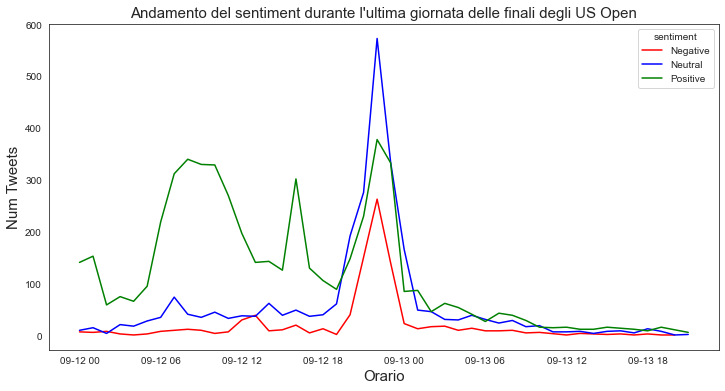

In [1795]:
plt.rcParams["figure.figsize"] = [12, 6]

colors = ["red", "blue", "green"]
sns.set_palette(sns.color_palette(colors))

figura = sns.lineplot(x='created_at_hour',y='num_tweets',  hue = 'sentiment', data=dataset_sentiment_nel_tempo, style ='sentiment', dashes= False)
plt.xlabel("Orario", fontsize= 15)
plt.ylabel("Num Tweets", fontsize= 15)
plt.title("Andamento del sentiment durante l'ultima giornata delle finali degli US Open", fontsize= 15)
#plt.savefig("AnalisiSentiment.png", dpi=1200, bbox_inches='tight')
plt.show()

In [2016]:
dataframe = dataframe.reindex(index=data.index[::-1])
dataframe.to_csv('dataset_tempo_testo.csv')

In [2017]:
d = dataframe[5590:7611]
d.to_csv('partita.csv')

In [1970]:
d = dataframe[:5590]
d.to_csv('pre_partita.csv')

In [1999]:
d = dataframe[7611:]
d.to_csv('post_partita.csv')

Tutta la parte di creazione dei vari dataframe

In [2018]:
partita = pd.read_csv('partita.csv')

In [2019]:
nData = pd.DataFrame(columns = ['created_at_hour','id', 'full_text','compound', 'sentiment'])

In [2020]:
index = 0
lista = []
check = False
for t in partita['full_text']:
    for word in t.split():
        if word == '@DjokerNole':
            check = True
       
    if check == True:
        lista.append(index)
    check = False
    index += 1

In [2021]:
n = 0
for i, t in partita.iterrows():
        if i in lista:
            nData.loc[n] = t
            n +=1

In [2022]:
nData.to_csv('partita_Djokovic.csv')

In [2023]:
nData = pd.DataFrame(columns = ['created_at_hour','id', 'full_text','compound', 'sentiment'])

In [2024]:
index = 0
lista = []
check = False
for t in partita['full_text']:
    for word in t.split():
        if word == '@DaniilMedwed': 
            check = True
      
    if check == True:
        lista.append(index)
    check = False
    index += 1

In [2025]:
n = 0
for i, t in partita.iterrows():
        if i in lista:
            nData.loc[n] = t
            n +=1

In [2026]:
nData.to_csv('partita_Medvedev.csv')

In [2029]:
partita = pd.read_csv('partita_Medvedev.csv')

In [2012]:
aggregation = {'num_tweets': ('id', 'count')}

dataset_sentiment_nel_tempo = partita.groupby(['created_at_hour', 'sentiment']).agg(**aggregation).reset_index()
dataset_sentiment_nel_tempo

,created_at_hour,sentiment,num_tweets
0,2021-09-13 00:00:00+00:00,Negative,3
1,2021-09-13 00:00:00+00:00,Neutral,1
2,2021-09-13 00:00:00+00:00,Positive,7
3,2021-09-13 01:00:00+00:00,Negative,1
4,2021-09-13 01:00:00+00:00,Neutral,1
5,2021-09-13 01:00:00+00:00,Positive,13
6,2021-09-13 02:00:00+00:00,Negative,1
7,2021-09-13 02:00:00+00:00,Neutral,1
8,2021-09-13 02:00:00+00:00,Positive,5
9,2021-09-13 03:00:00+00:00,Negative,1


2021-09-20 01:06:10,055 | INFO | category.py:218 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-09-20 01:06:10,066 | INFO | category.py:218 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


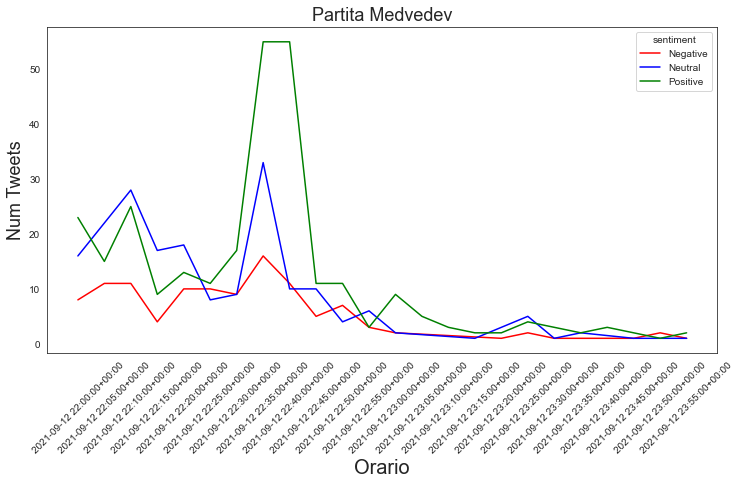

In [1887]:
plt.rcParams["figure.figsize"] = [12, 6]

colors = ["red", "blue", "green"]
sns.set_palette(sns.color_palette(colors))

figura = sns.lineplot(x='created_at_hour',y='num_tweets',  hue = 'sentiment', data=dataset_sentiment_nel_tempo, style ='sentiment', dashes= False)
plt.xlabel("Orario", fontsize= 20)
plt.ylabel("Num Tweets", fontsize= 18)
plt.title("Partita Medvedev", fontsize= 18)
plt.setp(figura.get_xticklabels(), rotation=45)
#plt.savefig("p_Medvedev.png", dpi=1200, bbox_inches='tight')
plt.show()

In [2030]:
analyzer = SentimentIntensityAnalyzer()
compound_scores=[]
tennisti_compound_scores = []
for tweet in partita["full_text"]:
    vs = analyzer.polarity_scores(tweet)
        
    compound_scores.append(vs['compound'])
print(f" Score: {np.percentile(compound_scores, 75)}")
tennisti_compound_scores.append({ 'sentiment': np.percentile(compound_scores, 75)})
compound_scores=[]

 Score: 0.6955


In [2036]:
lista = ['Giocatore', 'Pre Partita', 'Partita', 'Post Partita']
#nn = ['Medvedev', 'Djokovic']
gg = ['@DaniilMedwed', '@DjokerNole']
pre = [0.67353, 0.60878]
partita = [0.6955, 0.5994]
post = [0.8316, 0.8072]

In [2037]:
partita_sentiment = pd.DataFrame(columns = lista)

In [2038]:
#partita_sentiment['Nome'] = nn
partita_sentiment['Giocatore'] = gg
partita_sentiment['Pre Partita'] = pre
partita_sentiment['Partita'] = partita
partita_sentiment['Post Partita'] = post

In [2039]:
partita_sentiment

,Giocatore,Pre Partita,Partita,Post Partita
0,@DaniilMedwed,0.67353,0.6955,0.8316
1,@DjokerNole,0.60878,0.5994,0.8072


## Twitter

#### Prendo i tweet del file in cui li ho salvati

In [750]:
tweets = json.load(open('dati_USOpenFinal.json'))

In [751]:
tweet_texts = [tweet['full_text'] for tweet in tweets]
mentions = [user_mention['screen_name'] for tweet in tweets for user_mention in tweet['entities']['user_mentions']]
hashtags = [hashtag['text'] for tweet in tweets for hashtag in tweet['entities']['hashtags']]
words = [word for t in tweet_texts for word in t.split()]

In [752]:
#CONTEGGIO MENZIONI
cMenzioni = Counter(mentions)
pd.DataFrame(cMenzioni.most_common()[:10], columns = ['Menzioni','Conteggio'])

,Menzioni,Conteggio
0,EmmaRaducanu,1157
1,rorybremner,1072
2,Channel4,524
3,masterpiecepbs,499
4,stephenfry,490
5,C4Press,470
6,RedPlanetTV,442
7,DjokerNole,414
8,BritBox_UK,412
9,DaniilMedwed,408


In [748]:
#CONTEGGIO HASHTAG
cHashtags = Counter(hashtags)
pd.DataFrame(cHashtags.most_common()[:6], columns = ['Hashtag','Conteggio'])

,Hashtag,Conteggio
0,USOpenFinal,5944
1,USOpen,3270
2,USOpen2021,1950
3,EmmaRaducanu,781
4,Medvedev,655
5,Djokovic,623


In [951]:
count = 0
for t in tweet_texts:
    for word in t.split():
        if word == 'Slam':
            count += 1;
            p = word
print(p, count)

Slam 240
